In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing necessary Libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk

In [3]:
# import train_tweets.csv and test_tweets.csv data
data = pd.read_csv('data/Twitter Data.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
#Downloading essential datasets from nltk
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/sumith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sumith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sumith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# PREPROCESSING

In [6]:
#Seperating tweets from appended data
#this 'tweets' contains the tweets from train and test data
tweets = data.tweet
tweets

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

# TOKENIZATION

In [7]:
#tokenizing the data and then joining it back together 
from nltk import TweetTokenizer
#from nltk.tokenize import word_tokenize
tk = TweetTokenizer()
tweets = tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
tweets

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^ ^ Thanks ...
2       We love this ! Would you go ? #talk #makememor...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service ! Apple won't even talk t...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day ! Mak...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona ! ! ! #Apple #Store #BCN #Barc...
Name: tweet, Length: 7920, dtype: object

# REMOVING PUNCTUATIONS

In [8]:
#Replacing symbols and punctuations from tweets
tweets = tweets.str.replace('[^a-zA-Z]+', ' ')
tweets

0        fingerprint Pregnancy Test https goo gl h MfQ...
1       Finally a transparant silicon case Thanks to m...
2       We love this Would you go talk makememories un...
3       I m wired I know I m George I was made that wa...
4       What amazing service Apple won t even talk to ...
                              ...                        
7915    Live out loud lol liveoutloud selfie smile son...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely year old neighbor with her i...
7918    Finally got my smart pocket wifi stay connecte...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
tweets

0        fingerprint Pregnancy Test https goo gl h MfQ...
1       Finally a transparant silicon case Thanks to m...
2       We love this Would you go talk makememories un...
3       I m wired I know I m George I was made that wa...
4       What amazing service Apple won t even talk to ...
                              ...                        
7915    Live out loud lol liveoutloud selfie smile son...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely year old neighbor with her i...
7918    Finally got my smart pocket wifi stay connecte...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, Length: 7920, dtype: object

# REMOVING SHORT WORDS

In [11]:
#Removing small words from the tweets (words which has length <= 3)
tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) > 3]))
tweets

0       fingerprint Pregnancy Test https MfQV android ...
1       Finally transparant silicon case Thanks uncle ...
2       love this Would talk makememories unplug relax...
3       wired know George made that iphone cute davent...
4       What amazing service Apple even talk about que...
                              ...                        
7915    Live loud liveoutloud selfie smile sony music ...
7916    would like wish amazing Make every minute coun...
7917    Helping lovely year neighbor with iPad this mo...
7918    Finally smart pocket wifi stay connected anyti...
7919    Apple Barcelona Apple Store Barcelona travel i...
Name: tweet, Length: 7920, dtype: object

In [12]:
tweets

0       fingerprint Pregnancy Test https MfQV android ...
1       Finally transparant silicon case Thanks uncle ...
2       love this Would talk makememories unplug relax...
3       wired know George made that iphone cute davent...
4       What amazing service Apple even talk about que...
                              ...                        
7915    Live loud liveoutloud selfie smile sony music ...
7916    would like wish amazing Make every minute coun...
7917    Helping lovely year neighbor with iPad this mo...
7918    Finally smart pocket wifi stay connected anyti...
7919    Apple Barcelona Apple Store Barcelona travel i...
Name: tweet, Length: 7920, dtype: object

# STEMMING

In [13]:
#Stemming the tweets
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))

In [14]:
tweets

0       fingerprint pregnanc test https mfqv android a...
1       final transpar silicon case thank uncl soni xp...
2       love this would talk makememori unplug relax i...
3       wire know georg made that iphon cute daventri ...
4       what amaz servic appl even talk about question...
                              ...                        
7915    live loud liveoutloud selfi smile soni music h...
7916    would like wish amaz make everi minut count to...
7917    help love year neighbor with ipad this morn ju...
7918    final smart pocket wifi stay connect anytim an...
7919    appl barcelona appl store barcelona travel iph...
Name: tweet, Length: 7920, dtype: object

# REMOVING STOP WORDS

In [15]:
#Removing stopwords from the tweets
from nltk.corpus import stopwords 
stop = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))

In [16]:
len(stop)

179

In [17]:
tweets

0       fingerprint pregnanc test https mfqv android a...
1       final transpar silicon case thank uncl soni xp...
2       love would talk makememori unplug relax iphon ...
3       wire know georg made iphon cute daventri home ...
4       amaz servic appl even talk question unless stu...
                              ...                        
7915    live loud liveoutloud selfi smile soni music h...
7916    would like wish amaz make everi minut count to...
7917    help love year neighbor ipad morn made realis ...
7918    final smart pocket wifi stay connect anytim an...
7919    appl barcelona appl store barcelona travel iph...
Name: tweet, Length: 7920, dtype: object

In [18]:
#Replacing tweets columns from the merged data with processed tweets data
data.tweet = tweets
data

,id,label,tweet
0,1,0,fingerprint pregnanc test https mfqv android a...
1,2,0,final transpar silicon case thank uncl soni xp...
2,3,0,love would talk makememori unplug relax iphon ...
3,4,0,wire know georg made iphon cute daventri home ...
4,5,1,amaz servic appl even talk question unless stu...
...,...,...,...
7915,7916,0,live loud liveoutloud selfi smile soni music h...
7916,7917,0,would like wish amaz make everi minut count to...
7917,7918,0,help love year neighbor ipad morn made realis ...
7918,7919,0,final smart pocket wifi stay connect anytim an...


# TFIDF VECTORIZATION

In [19]:
#Vectorizing the tweets using TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = stop)
data_vec = vec.fit_transform(tweets)

In [20]:
data_vec

<7920x17793 sparse matrix of type '<class 'numpy.float64'>'
	with 88622 stored elements in Compressed Sparse Row format>

In [21]:
#Seperating label y from the train_data
y = data.label
y = y.values
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

0    5894
1    2026
dtype: int64

# SPLITTING TRAIN & TEST DATA

In [23]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,random_state=42)

In [24]:
X_train[0]

<1x17793 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [25]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_train[0,0:10].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# LOGISTIC REGRESSION

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [30]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8009259259259259

# RANDOM FOREST CLASSIFIER

In [32]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_pred2 = model2.predict(X_test)

In [33]:
y_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [34]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2)

0.7995365005793742

# XGB CLASSIFIER

In [36]:
#XGBClassifier
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

In [37]:
y_pred3

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred3)

0.7939464493597207

# SUPPORT VECTOR MACHINE

In [40]:
#SVC - Supoprt Vector Classifier
from sklearn.svm import SVC  
model4= SVC()
model4.fit(X_res,y_res)
y_pred4 = model4.predict(X_test)

In [41]:
y_pred4

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred4)

0.7994955863808322

# K-NEAREST NEIGHBOUR

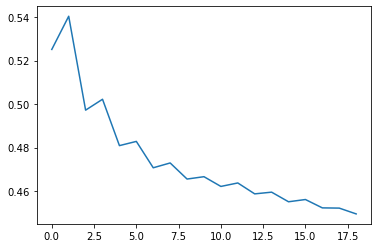

In [44]:
#KNN Classsifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

score = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_res, y_res)
  y_pred = knn.predict(X_test)
  score_1 = f1_score(y_test, y_pred)
  score.append(score_1)
plt.plot(score)
plt.show()

# HYPER-PARAMETER TUNING - LOGISTIC REGRESSION

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
kf = KFold(n_splits = 10, shuffle = True)

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10, 20, 50],
          'tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

          
cls = LogisticRegression()
search = GridSearchCV(cls, params, cv = kf.split(data_vec, y), n_jobs = -1, scoring = 'f1')
search.fit(data_vec, y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fb5212e9b30>,
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10,
                               20, 50],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1')

In [46]:
pred = model.predict(X_test)

In [47]:
pred

array([1, 0, 0, ..., 0, 0, 1])

In [48]:
search.best_estimator_

LogisticRegression(C=3, tol=1e-06)

In [49]:
search.best_score_

0.7615086613390597

# SMOTE

In [50]:
#Over_sampling the whole train data to tackle imbalance
smote2 = SMOTE()
XF_res, yF_res = smote2.fit_resample(data_vec, y)

In [51]:
model_LR = search.best_estimator_
model_LR.fit(X_res, y_res)
y_pred5 = model_LR.predict(X_test)

In [52]:
pred = model_LR.predict(X_test)

In [53]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred5)

0.8108747044917257